In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
try:
    import google.colab
    path = "/content/drive/MyDrive/Uni/Magistrale/AAS/Project/logs/"
except:
    path = "models/simpler/logs/"

In [28]:
random = np.load(path + 'random.npy', allow_pickle=True)
a2c = np.load(path + 'a2c.npy', allow_pickle=True)
dqn = np.load(path + 'dqn.npy', allow_pickle=True)

In [29]:
timesteps_random, rewards_random = np.array([list(exp.keys())[0] for exp in random]), np.array([list(exp.values())[0] for exp in random])
timesteps_a2c, rewards_a2c = np.array([list(exp.keys())[0] for exp in a2c]), np.array([list(exp.values())[0] for exp in a2c])
timesteps_dqn, rewards_dqn = np.array([list(exp.keys())[0] for exp in dqn]), np.array([list(exp.values())[0] for exp in dqn])

In [30]:
data_random = pd.DataFrame([timesteps_random, rewards_random], index=['timesteps', 'rewards']).T
data_a2c = pd.DataFrame([timesteps_a2c, rewards_a2c], index=['timesteps', 'rewards']).T
data_dqn = pd.DataFrame([timesteps_dqn, rewards_dqn], index=['timesteps', 'rewards']).T

In [31]:
def compute_rolling_means_and_std(data, n=50):
    rolling_series = data['rewards'][::-1].rolling(window=n)
    running_means = rolling_series.mean()[::-1].iloc[:-n].values
    running_stds = rolling_series.std()[::-1].iloc[:-n].values
    return running_means, running_stds, (running_means - running_stds, running_means + running_stds)

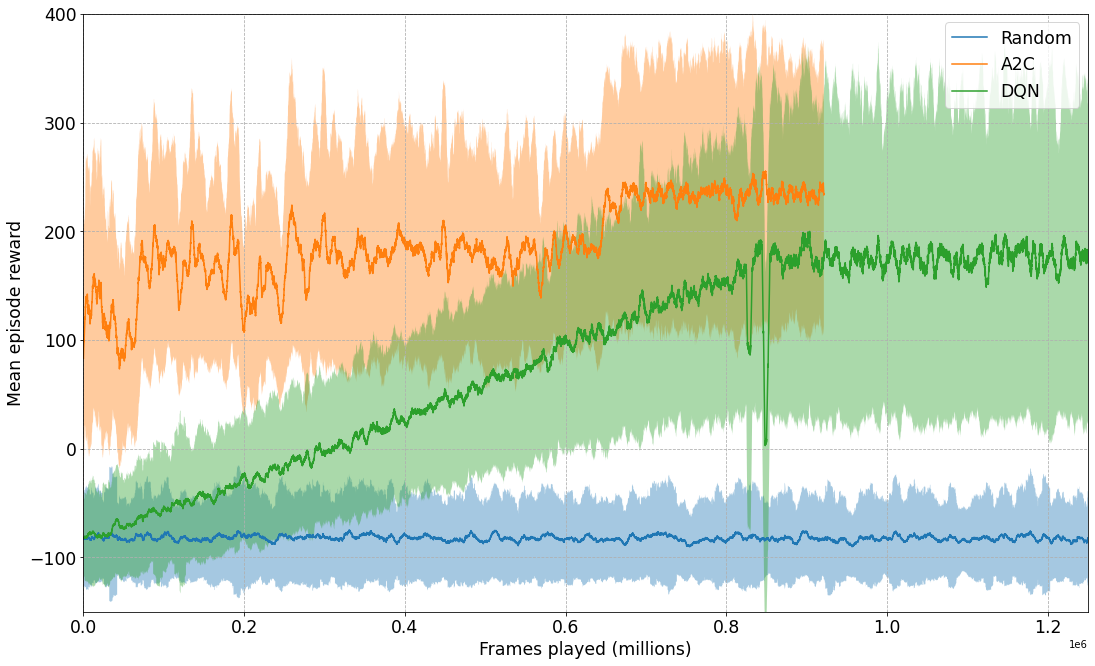

In [32]:
N = 300

fig, ax = plt.subplots(figsize=(18,11))
rmean_rand, rstd_rand, cis_rand = compute_rolling_means_and_std(data_random, N)
rmean_a2c, rstd_a2c, cis_a2c = compute_rolling_means_and_std(data_a2c, N)
rmean_dqn, rstd_dqn, cis_dqn = compute_rolling_means_and_std(data_dqn, N)
ax.fill_between(timesteps_random[:-N], cis_rand[0], cis_rand[1], alpha=0.4)
ax.fill_between(timesteps_a2c[:-N], cis_a2c[0], cis_a2c[1], alpha=0.4)
ax.fill_between(timesteps_dqn[:-N], cis_dqn[0], cis_dqn[1], alpha=0.4)
ax.plot(timesteps_random[:-N], rmean_rand, label='Random')
ax.plot(timesteps_a2c[:-N], rmean_a2c, label='A2C')
ax.plot(timesteps_dqn[:-N], rmean_dqn, label='DQN')
ax.legend(fontsize = 'xx-large')
ax.grid(linestyle='--')
ax.set_xlim(0, 1250000)
ax.set_ylim(-150, 400)
ax.tick_params(axis='both',labelsize='xx-large')
plt.ylabel('Mean episode reward', fontdict={'fontsize': 'xx-large'})
plt.xlabel('Frames played (millions)', fontdict={'fontsize': 'xx-large'});